In [1]:
import os
import sys
sys.path.append(os.environ.get('NOTEBOOK_ROOT'))

import xarray as xr
import numpy as np
import pandas as pd

# Ensure string casts of NumPy arrays 
# print as much as possible (no '...').
np.set_printoptions(threshold=sys.maxsize)

import matplotlib.pyplot as plt

In [2]:
from odc_gee.earthengine import Datacube as GEE_Datacube
dc = GEE_Datacube()

In [3]:
dc.list_products()

,name,description,lat,instrument,region_code,lon,product_family,platform,format,creation_time,time,label,dataset_maturity,crs,resolution,tile_size,spatial_dimensions
id,,,,,,,,,,,,,,,,,
2,ls8_l2_c1_t1_google,Landsat 8 Collection 1 Level 2 Surface Reflect...,None,None,None,None,None,None,None,None,None,None,None,EPSG:4326,"(-0.00027777777778, 0.00027777777778)",None,"(latitude, longitude)"
1,ls8_l2_c1_t2_google,Landsat 8 Collection 1 Level 2 Surface Reflect...,None,None,None,None,None,None,None,None,None,None,None,EPSG:4326,"(-0.00027777777778, 0.00027777777778)",None,"(latitude, longitude)"


In [4]:
ds = dc.load(product='ls8_l2_c1_t1_google',
             # Lake Mead
#              lat = (36.384826, 36.445486),
#              lon = (-114.400928, -114.326445),
#              time= ('2020-06-01', '2021-06-30'),
             # Elizabeth River, VA (sml tst)
             lat=(36.89, 36.895),
             lon=(-76.40,-76.395),
             time=('2014-01-01', '2014-06-30'),
             # Elizabeth River, VA
#              lat=(36.894872, 36.969353),
#              lon=(-76.394949,-76.260025),
#              time=('2014-01-01', '2014-06-30'),
             # Prospect Lake, CO
#              lat = (38.822297, 38.827771),
#              lon = (-104.804378, -104.793997),
             # Pueblo Reservoir, CO
#              lat = (38.23319252391589, 38.28728420493292),
#              lon = (-104.80201949531988, -104.72186163717585),
#              time=('2013-01-01', '2019-12-31'),
             measurements=['pixel_qa'],
             group_by='solar_day')

In [5]:
from utils.data_cube_utilities.clean_mask import landsat_qa_clean_mask

clean_da = \
    landsat_qa_clean_mask(ds, 'LANDSAT_8', collection='c1', level='l2')

In [6]:
from skimage.morphology import remove_small_objects
clean_da.values = remove_small_objects(clean_da.values, min_size=64)

In [7]:
# clean_da_filtered = xr.DataArray(clean_da_filtered)

In [8]:
# clean_da_filtered.mean('dim_0').plot()

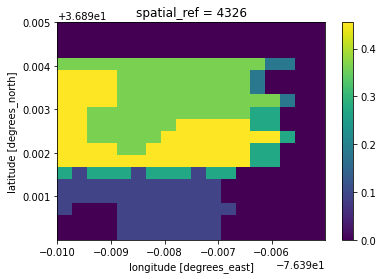

In [9]:
clean_da.mean('time').plot()

In [101]:
import importlib
from utils.data_cube_utilities.voxel_visualizer import voxel_visualizer
importlib.reload(voxel_visualizer)
from utils.data_cube_utilities.voxel_visualizer.voxel_visualizer import voxel_visualize

voxel_visualize(clean_da, 
                # Voxel distances
#                 x_scale=1, y_scale=1, z_scale=1, distance_scale=1, 
                # Voxel size
#                 voxel_size=4,
#                 voxel_opacity=0.75,
#                 show_stats=True,
#                 show_controls=False
)